In [1]:
import zipfile
import pandas as pd
import json
import numpy as np

In [2]:
archive = zipfile.ZipFile('./reczilla/Two_tower_results.zip', 'r')
individual_files = archive.namelist()
individual_files = list(set([f.split('/')[1] for f in individual_files if len(f.split('/'))>1]))
individual_files = ['Two_tower_results/' + f + '/result.zip' for f in individual_files if f!='']

In [3]:
results = archive.open('Two_tower_results/AmazonHomeImprovement-TwoTower/result.zip', mode='r')
results = zipfile.ZipFile(results)

In [4]:
col_names = results.namelist()
col_names = [col.split(".json")[0].replace(".","") for col in col_names if 'DataIO_attribute_to_file_name' not in col] + ['dataset']
results_dict = json.loads(results.open('result_on_test_best.json').read())
#col_names = [col for col in col_names if col not in ['search_params','DataIO_attribute_to_file_name']]

In [5]:
metric_cols = []
for cut in results_dict.keys():
    for key in results_dict[cut].keys():
        metric_cols.append('test_metric_{}_cut_{}'.format(key, cut))
col_names = col_names + metric_cols
list_of_dicts = {col:[] for col in col_names}

In [6]:
import pandas as pd
for fname in individual_files:
    try:
        results = archive.open(fname, mode='r')
        results_archive = zipfile.ZipFile(results)
        result_files = results_archive.namelist()
        for rfile in result_files:
            col_name = rfile.split(".json")[0]
            try:
                if col_name in list_of_dicts:
                    if col_name!='result_on_test_best':
                        list_of_dicts[col_name].append(results_archive.open(rfile).read())
                    else:
                        list_of_dicts[col_name].append(results_archive.open(rfile).read())
                        results_here = json.loads(results_archive.open('result_on_test_best.json').read())
                        if results_here:
                            for cut in results_here.keys():
                                for key in results_here[cut].keys(): 
                                    list_of_dicts['test_metric_{}_cut_{}'.format(key, cut)].append(results_here[cut][key])
                        else:
                            for metric_col in metric_cols:
                                list_of_dicts[metric_col].append(np.nan)
            except Exception as e:
                print(rfile)
        list_of_dicts['dataset'].append(fname.split('/')[1])
    except Exception as e:
        print(e)
        print("{} not found".format(fname))
        print("\n")
meta_data_df = pd.DataFrame(list_of_dicts)

"There is no item named 'Two_tower_results/AmazonIndustrialScientific-TwoTower/result.zip' in the archive"
Two_tower_results/AmazonIndustrialScientific-TwoTower/result.zip not found


"There is no item named 'Two_tower_results/AmazonHomeKitchen-TwoTower/result.zip' in the archive"
Two_tower_results/AmazonHomeKitchen-TwoTower/result.zip not found


"There is no item named 'Two_tower_results/AmazonAppliances-TwoTower/result.zip' in the archive"
Two_tower_results/AmazonAppliances-TwoTower/result.zip not found




In [7]:
filename = './reczilla/metadata-v4.pkl'
results = pd.read_pickle(filename)

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import os
import numpy as np
import json
import pickle
import random
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

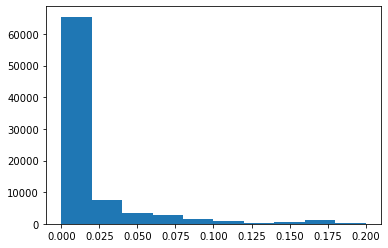

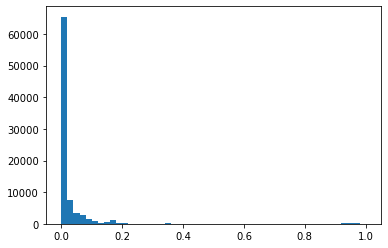

Histogram of test_metric_COVERAGE_ITEM_HIT_cut_50


In [9]:
metric = 'test_metric_COVERAGE_ITEM_HIT_cut_50'
results_notna = results[results[metric].notna()]

plt.hist(results_notna[metric], range=[0,0.2])
plt.show()
plt.hist(results_notna[metric], range=[0,1], bins=50)
plt.show()
print('Histogram of ' + metric)

In [10]:
results.head()

,alg_family,dataset_name,split_name,original_split_path,hyperparameters_source,time_on_val,time_on_test,time_on_train,test_metric_ARHR_ALL_HITS_cut_1,test_metric_ARHR_ALL_HITS_cut_10,...,param_similarity_from_distance_mode,param_solver,param_symmetric,param_topK,param_total_anneal_steps,param_tversky_alpha,param_tversky_beta,param_use_bias,param_user_reg,alg_param_name
2,UserKNNCF,AmazonElectronicsReader,DataSplitter_leave_k_out_last,gs://reczilla-results/dataset-splits/splits-v5...,default,4583.751314,4548.318467,17298.476997,0.000034,0.000443,...,lin,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,UserKNNCF:euclidean_default
34,TopPop,Jester2Reader,DataSplitter_leave_k_out_last,gs://reczilla-results/dataset-splits/splits-v5...,default,192.594337,193.140875,0.047207,0.053858,0.147120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TopPop:default
137,IALSRecommender,YahooMoviesReader,DataSplitter_leave_k_out_last,gs://reczilla-results/dataset-splits/splits-v5...,default,26.554102,26.568692,606.267164,0.011777,0.031597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IALSRecommender:default
138,IALSRecommender,YahooMoviesReader,DataSplitter_leave_k_out_last,gs://reczilla-results/dataset-splits/splits-v5...,random_0,26.585350,26.700649,6660.612675,0.000393,0.003225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IALSRecommender:random_0
139,IALSRecommender,YahooMoviesReader,DataSplitter_leave_k_out_last,gs://reczilla-results/dataset-splits/splits-v5...,random_1,26.952350,26.308905,618.663741,0.009814,0.030576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IALSRecommender:random_1


In [11]:
algs = results_notna['alg_family']
datasets = results_notna['dataset_name']
unique_algs = []
for alg in algs:
    if alg not in unique_algs:
        unique_algs.append(alg)
unique_datasets = []
for dataset in datasets:
    if dataset not in unique_datasets:
        unique_datasets.append(dataset)

print(unique_datasets)
print()
print(unique_algs)

['AmazonElectronicsReader', 'Jester2Reader', 'YahooMoviesReader', 'AmazonIndustrialScientificReader', 'AmazonKindleStoreReader', 'AmazonAlternativeRockReader', 'AnimeReader', 'AmazonJazzReader', 'MovieTweetingsReader', 'AmazonPetSuppliesReader', 'Movielens1MReader', 'AmazonDavisReader', 'AmazonAppstoreforAndroidReader', 'AmazonAmazonInstantVideoReader', 'WikilensReader', 'CiaoDVDReader', 'AmazonDanceElectronicReader', 'Movielens100KReader', 'AmazonAllBeautyReader', 'FrappeReader', 'LastFMReader', 'AmazonSoftwareReader', 'AmazonCollectiblesFineArtReader', 'AmazonMP3PlayersAccessoriesReader', 'RecipesReader', 'AmazonComputersReader', 'AmazonAllElectronicsReader', 'NetflixPrizeReader', 'AmazonVideoGamesReader', 'AmazonLuxuryBeautyReader', 'AmazonAmazonFashionReader', 'MarketBiasAmazonReader', 'AmazonDigitalMusicReader', 'AmazonBuyaKindleReader', 'AmazonSportsOutdoorsReader', 'AmazonRapHipHopReader', 'AmazonBabyReader', 'AmazonToysGamesReader', 'AmazonWineReader', 'AmazonHardRockMetalReade

In [12]:
meta_data_df['dataset_name'] = meta_data_df['dataset'].apply(lambda x:x.split('-')[0]+'Reader')

In [13]:
metric_cols_results = [col for col in metric_cols if col in results.columns]

In [14]:
amazon_results = results[results.dataset_name.isin(meta_data_df.dataset_name)].rename(columns={'alg_family':'algorithm_name_recommender'})[metric_cols_results + ['dataset_name','algorithm_name_recommender']]

In [15]:
all_results = pd.concat([meta_data_df[metric_cols + ['dataset_name','algorithm_name_recommender']], amazon_results[metric_cols + ['dataset_name','algorithm_name_recommender']]])

In [16]:
algs = all_results['algorithm_name_recommender']
datasets = all_results['dataset_name']
unique_algs = []
for alg in algs:
    if alg not in unique_algs:
        unique_algs.append(alg)
unique_datasets = []
for dataset in datasets:
    if dataset not in unique_datasets:
        unique_datasets.append(dataset)

print(unique_datasets)
print()
print(unique_algs)

['AmazonClothingShoesJewelryReader', 'AmazonAppstoreforAndroidReader', 'AmazonComputersReader', 'AmazonAutomotiveReader', 'AmazonBeautyReader', 'AmazonDavisReader', 'AmazonElectronicsReader', 'AmazonClassicalReader', 'AmazonBluesReader', 'AmazonGospelReader', 'AmazonAmazonInstantVideoReader', 'AmazonHealthPersonalCareReader', 'AmazonAmazonFashionReader', 'AmazonAppsforAndroidReader', 'AmazonHomeImprovementReader', 'AmazonAlternativeRockReader', 'AmazonDigitalMusicReader', 'AmazonCDsVinylReader', 'AmazonCellPhonesAccessoriesReader', 'AmazonHardRockMetalReader', 'AmazonFolkReader', 'AmazonCollectiblesFineArtReader', 'AmazonBuyaKindleReader', 'AmazonArtsCraftsSewingReader', 'AmazonAllBeautyReader', 'AmazonBabyProductsReader', 'AmazonAllElectronicsReader', 'AmazonCountryReader', 'AmazonBabyReader', 'AmazonDanceElectronicReader', 'AmazonChristianReader', 'AmazonBooksReader', 'AmazonGiftCardsReader', 'AmazonGroceryGourmetFoodReader']

[b'"Two_Tower_Recommender"', 'UserKNNCF', 'SlopeOne', 'IA

In [17]:
metrics = []
datasets = []
top_1 = []
top_2 = []
top_3 = []
from tqdm import tqdm
for metric in tqdm(metric_cols):
    for dataset in unique_datasets:
        results_notna = all_results[all_results[metric].notna()]
        dataset_results = results_notna.loc[results_notna['dataset_name'] == dataset]
        #print(dataset_results[['alg_name', metric]])
        dataset_results = dataset_results.sort_values(by=[metric], ascending=False)
        dataset_results = dataset_results.reset_index()
        #print(dataset_results[['alg_name', metric]])
        try:
            top_3_algs = [dataset_results.sort_values(by=[metric]).loc[i]['algorithm_name_recommender'] for i in range(3)]
            metrics.append(metric)
            datasets.append(dataset)
            top_1.append(top_3_algs[0])
            top_2.append(top_3_algs[1])
            top_3.append(top_3_algs[2])
            #print(dataset, '\n', top_3_algs)
        except:
            pass
            #print(metric, dataset)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 330/330 [07:37<00:00,  1.39s/it]


In [18]:
meta_merged_df = pd.DataFrame({'metric':metrics,'dataset':datasets,'top_algo_1':top_1,'top_algo_2':top_2,'top_algo_3':top_3})

### Two Tower relative performance

In [19]:
meta_merged_df[meta_merged_df.top_algo_1==b'"Two_Tower_Recommender"']['dataset'].nunique()/meta_merged_df['dataset'].nunique()

0.9090909090909091

In [20]:
meta_merged_df[meta_merged_df.top_algo_1==b'"Two_Tower_Recommender"']['metric'].nunique()/meta_merged_df['metric'].nunique()

0.21515151515151515

In [21]:
metricwise_performance = meta_merged_df.groupby('metric').apply(lambda x:x[x.top_algo_1==b'"Two_Tower_Recommender"']['dataset'].nunique()/x['dataset'].nunique()).reset_index().rename(columns={0:'winning_dataset_fraction'})

In [25]:
datasetwise_performance = meta_merged_df.groupby('dataset').apply(lambda x:x[x.top_algo_1==b'"Two_Tower_Recommender"']['metric'].nunique()/x['metric'].nunique()).reset_index().rename(columns={0:'winning_metrics_fraction'})

In [26]:
metricwise_performance.sort_values(by='winning_dataset_fraction', ascending=False)

,metric,winning_dataset_fraction
329,test_metric_USERS_IN_GT_cut_9,0.909091
75,test_metric_COVERAGE_USER_cut_1,0.909091
77,test_metric_COVERAGE_USER_cut_15,0.909091
78,test_metric_COVERAGE_USER_cut_2,0.909091
79,test_metric_COVERAGE_USER_cut_20,0.909091
...,...,...
160,test_metric_HIT_RATE_cut_50,0.000000
161,test_metric_HIT_RATE_cut_6,0.000000
162,test_metric_HIT_RATE_cut_7,0.000000
163,test_metric_HIT_RATE_cut_8,0.000000


In [28]:
datasetwise_performance.sort_values(by='winning_metrics_fraction', ascending=False)

,dataset,winning_metrics_fraction
6,AmazonAppstoreforAndroidReader,0.206061
20,AmazonComputersReader,0.172727
23,AmazonDavisReader,0.145455
0,AmazonAllBeautyReader,0.136364
15,AmazonCellPhonesAccessoriesReader,0.136364
31,AmazonHealthPersonalCareReader,0.136364
30,AmazonHardRockMetalReader,0.136364
29,AmazonGroceryGourmetFoodReader,0.136364
28,AmazonGospelReader,0.136364
27,AmazonGiftCardsReader,0.136364
